#  Time Series Analysis

Energy Systems 

TU Berlin
***

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

***
# Introductory Comments

## Getting Help

Executing cells with Shift-Enter and with `h` there is help.

Help is available with `.<TAB>` or `load.sort_values()` <- cursor between brackets, `Shift-<TAB>`

## Using one-dimensional arrays (Numpy and Pandas)

**Numpy**

In [2]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
a[1:3]

array([1, 2])

**Pandas**

In [4]:
s = pd.Series(np.random.random(3), index=['foo', 'bar', 'baz'])
s

foo    0.166403
bar    0.530443
baz    0.292426
dtype: float64

In [5]:
s["foo":"bar"]

foo    0.166403
bar    0.530443
dtype: float64

## Using two-dimensional arrays (Numpy and Pandas)

**Numpy** 

In [6]:
np.random.random((3,5))

array([[0.49777149, 0.79767298, 0.64660906, 0.78173876, 0.14605458],
       [0.49474316, 0.03605723, 0.17203743, 0.73277686, 0.68861143],
       [0.29671738, 0.57983916, 0.84721414, 0.77365963, 0.9909827 ]])

**Pandas**

In [7]:
s = pd.DataFrame(np.random.random((3,5)),
                 index=['foo', 'bar', 'baz'],
                 columns=['colA', 'colB', 'colC', 'colD', 'colE'])
s

,colA,colB,colC,colD,colE
foo,0.291300,0.779315,0.432071,0.051529,0.124926
bar,0.698957,0.655359,0.581314,0.273040,0.780045
baz,0.154158,0.369052,0.265100,0.413193,0.595214


In [8]:
s.mean()

colA    0.381472
colB    0.601242
colC    0.426162
colD    0.245921
colE    0.500062
dtype: float64

In [9]:
s.mean(axis=1)

foo    0.335828
bar    0.597743
baz    0.359343
dtype: float64

***
# Problem I.1

The following data are made available to you on the repository in the `./data` directory:

`de_data.csv`, `gb_data.csv`, `eu_data.csv`
and alternatively
`wind.csv`, `solar.csv`, `load.csv`

They describe (quasi-real) time series for wind power generation $W(t)$, solar power generation $S(t)$ and load $L(t)$ in Great Britain (GB), Germany (DE) and Europe (EU). The time step is 1 h and the time series are several years long.

> Remark: In this example notebook, we only look at Germany and the EU, Great Britain works in exactly the same way.

***
**Read Data**

In [10]:
de = pd.read_csv('data/de_data.csv', parse_dates=True, index_col=0)
eu = pd.read_csv('data/eu_data.csv', parse_dates=True, index_col=0)
gb = pd.read_csv('data/gb_data.csv', parse_dates=True, index_col=0)

In [11]:
wind = pd.read_csv('data/wind.csv', parse_dates=True, index_col=0)
solar = pd.read_csv('data/solar.csv', parse_dates=True, index_col=0)
load = pd.read_csv('data/load.csv', parse_dates=True, index_col=0)

Extra: Show the first and last 5 lines (header) of the German data:

In [12]:
de.head()

,wind,solar,load
time,,,
2011-01-01 00:00:00,0.535144,0.0,46209.0
2011-01-01 01:00:00,0.580456,0.0,44236.0
2011-01-01 02:00:00,0.603605,0.0,42502.0
2011-01-01 03:00:00,0.614114,0.0,41479.0
2011-01-01 04:00:00,0.627257,0.0,39923.0


In [13]:
de.tail()

,wind,solar,load
time,,,
2014-12-31 19:00:00,0.191347,0.0,50365.0
2014-12-31 20:00:00,0.220209,0.0,48725.0
2014-12-31 21:00:00,0.247598,0.0,49074.0
2014-12-31 22:00:00,0.273812,0.0,47667.0
2014-12-31 23:00:00,0.295076,0.0,47667.0


Extra: Check that wind, solar and load files are just differently organized datasets and it's the same data:

In [14]:
(wind['DE'] == de['wind']).all()

True

Extra: How many years does the dataset comprise?

In [15]:
de.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', name='time', length=35064, freq=None)

Data set includes four years ranging from `2011-01-01` until `2014-12-31`.

***
**(a) Check that the wind and solar time series are normalized to ’per-unit of installed capacity’,
and that the load time series is given in MW.**

In [16]:
wind.max()

DE    0.994588
GB    0.999998
EU    0.719222
dtype: float64

In [17]:
load.max()

DE     79286.0
GB     55614.0
EU    539904.0
dtype: float64

***
**(b) For all three regions, calculate the maximum, mean, and variance of the time series.**

In [18]:
pd.concat([eu, de, gb], axis=1, keys=["eu", "de", "gb"]).describe()

eu                                         de                \
               wind         solar           load          wind         solar   
count  35064.000000  35064.000000   35064.000000  35064.000000  35064.000000   
mean       0.238825      0.156654  357003.275140      0.265785      0.149262   
std        0.124324      0.210926   61235.523002      0.239194      0.221564   
min        0.022194      0.000000  222327.000000      0.000577      0.000000   
25%        0.141962      0.000000  309072.000000      0.078827      0.000000   
50%        0.217789      0.012116  358094.500000      0.181354      0.000000   
75%        0.316816      0.308416  397490.250000      0.394514      0.268505   
max        0.719222      0.808031  539904.000000      0.994588      0.913781   

                               gb                              
               load          wind         solar          load  
count  35064.000000  35064.000000  35064.000000  35064.000000  
mean   54877.199806      0.377176      0.124691  34573.316678  
std    10354.693128      0.280585      0.195193   7475.509068  
min    29201.000000      0.002075      0.000000  18159.000000  
25%    46321.750000      0.137268      0.000000  28860.000000  
50%    54594.000000      0.301760      0.000000  34843.000000  
75%    63953.250000      0.586097      0.202772  39577.000000  
max    79286.000000      0.999998      0.888284  55614.000000

In [19]:
pd.concat([eu, de, gb], axis=1, keys=["eu", "de", "gb"]).var()

eu  wind     1.545653e-02
    solar    4.448970e-02
    load     3.749789e+09
de  wind     5.721393e-02
    solar    4.909081e-02
    load     1.072197e+08
gb  wind     7.872780e-02
    solar    3.810050e-02
    load     5.588324e+07
dtype: float64

There are 35064 time slots: 8760h*4 + 24 (2012 was a leap year!)

The wind and solar time series have a maximum slightly below 1, thus we can conclude that per-unit values are given.

The maximum may be below 1 if normalisation was performed on a longer time period.

The load time series has a unit of MW, with the mean of 55 GW, which is typical for Germany.

Max, mean and variance as shown above in per-unit/MW.

***
**(c) For all three regions, plot the time series $W (t)$, $S(t)$, $L(t)$ for a winter month (January) and a summer month (July).**

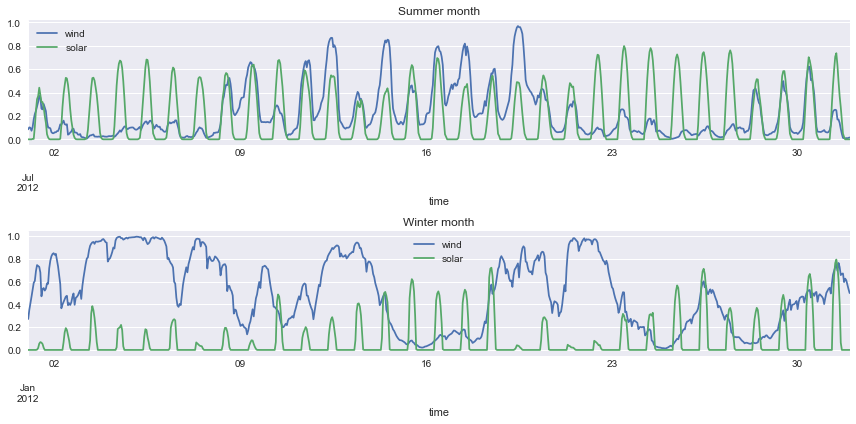

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
de.loc["2012-07", ['wind', 'solar']].plot(ax=axes[0])
axes[0].set_title("Summer month")
de.loc["2012-01", ['wind', 'solar']].plot(ax=axes[1])
axes[1].set_title("Winter month")
fig.tight_layout()

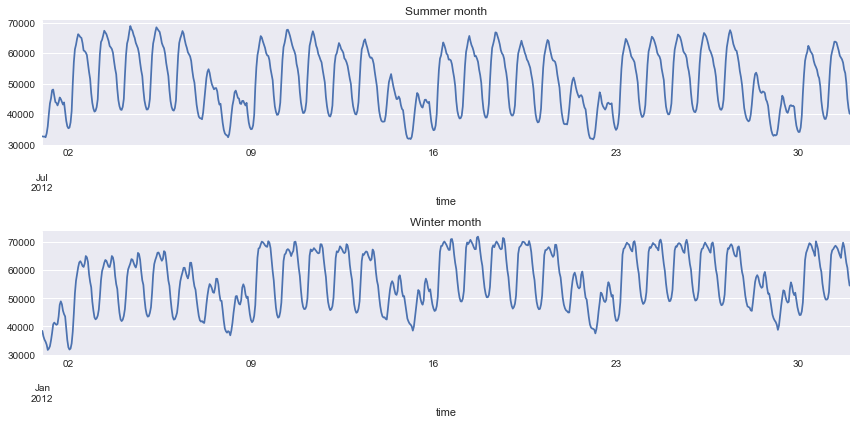

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
de.loc["2012-07", 'load'].plot(ax=axes[0])
axes[0].set_title("Summer month")
de.loc["2012-01", 'load'].plot(ax=axes[1])
axes[1].set_title("Winter month")
fig.tight_layout()

Let's also compare the wind between the different regions

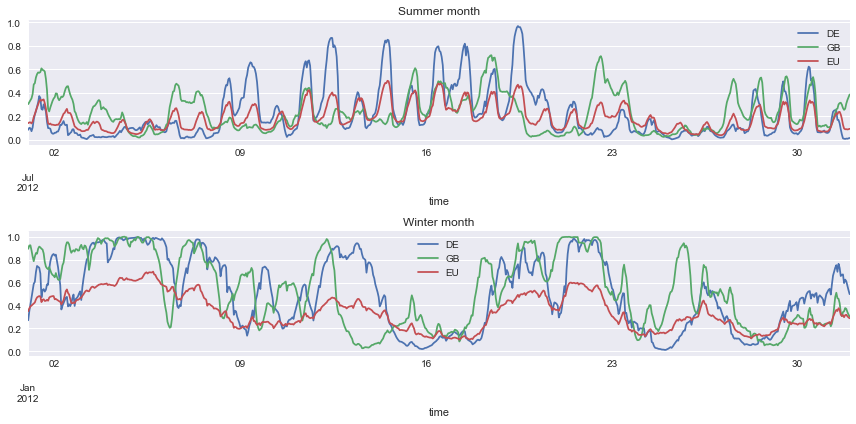

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
wind.loc["2012-7", ['DE', 'GB', 'EU']].plot(ax=axes[0])
axes[0].set_title("Summer month")
wind.loc["2012-1", ['DE', 'GB', 'EU']].plot(ax=axes[1])
axes[1].set_title("Winter month")
fig.tight_layout()

***
**(d) Resample the time series to daily, weekly and monthly data points and visualise them in plots. Can you identify some recurring patterns?**

> **Hint:** Use the function [`.resample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)  with `.mean`.

Wind:

<AxesSubplot:xlabel='time'>

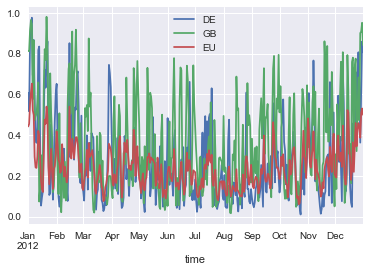

In [23]:
wind.loc["2012",['DE','GB','EU']].resample('D').mean().plot()

<AxesSubplot:xlabel='time'>

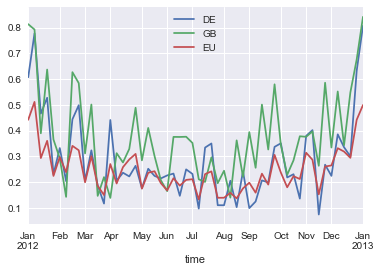

In [24]:
wind.loc["2012",['DE','GB','EU']].resample('W').mean().plot()

<AxesSubplot:xlabel='time'>

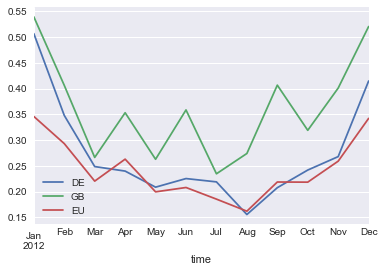

In [25]:
wind.loc["2012",['DE','GB','EU']].resample('M').mean().plot()

Solar:

<AxesSubplot:xlabel='time'>

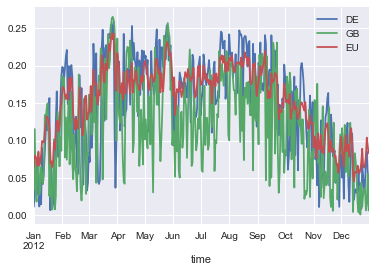

In [26]:
solar.loc["2012",['DE','GB','EU']].resample('D').mean().plot()

<AxesSubplot:xlabel='time'>

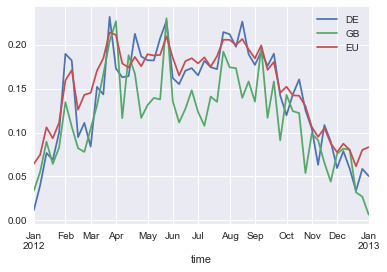

In [27]:
solar.loc["2012",['DE','GB','EU']].resample('W').mean().plot()

<AxesSubplot:xlabel='time'>

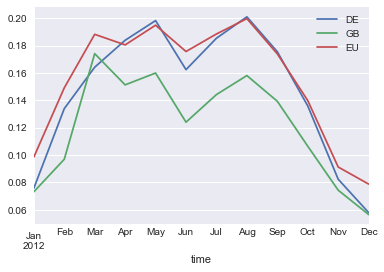

In [28]:
solar.loc["2012",['DE','GB','EU']].resample('M').mean().plot()

Load:

<AxesSubplot:xlabel='time'>

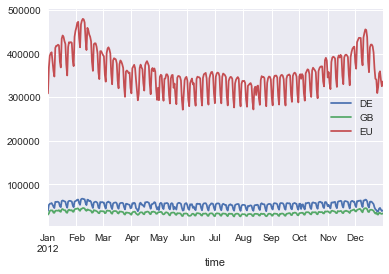

In [29]:
load.loc["2012",['DE','GB','EU']].resample('D').mean().plot()

<AxesSubplot:xlabel='time'>

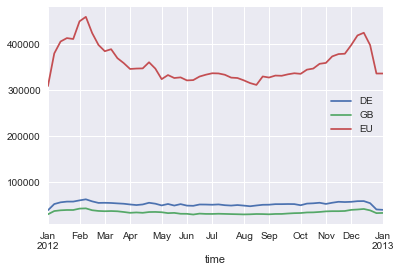

In [30]:
load.loc["2012",['DE','GB','EU']].resample('W').mean().plot()

<AxesSubplot:xlabel='time'>

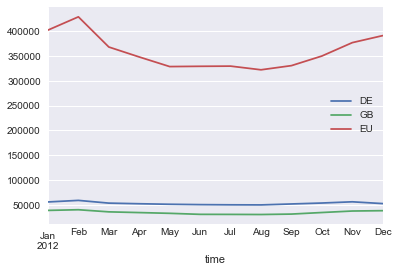

In [31]:
load.loc["2012",['DE','GB','EU']].resample('M').mean().plot()

***
**(e) For all three regions, plot the duration curve for $W(t)$, $S(t)$, $L(t)$.** 
> **Hint:** You might want to make use of the functions [`.sort_values`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) and [`.reset_index`](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.reset_index.html)

> **Tip:** Go through the line `de['wind'].sort_values(ascending=False).reset_index(drop=True).plot()` dot by dot and note what happens to the output.

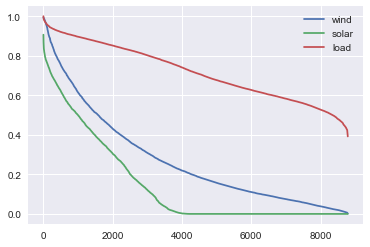

In [32]:
year="2012"
de['wind'].loc[year].sort_values(ascending=False).reset_index(drop=True).plot()
de['solar'].loc[year].sort_values(ascending=False).reset_index(drop=True).plot()
l = de['load'].loc[year]
l /= l.max() # normalize load
l.sort_values(ascending=False).reset_index(drop=True).plot()
plt.legend()

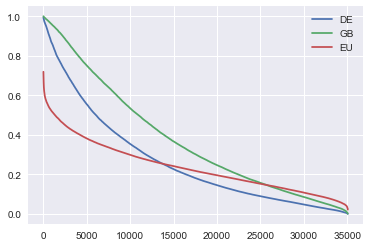

In [33]:
wind['DE'].sort_values(ascending=False).reset_index(drop=True).plot()
wind['GB'].sort_values(ascending=False).reset_index(drop=True).plot()
wind['EU'].sort_values(ascending=False).reset_index(drop=True).plot()
plt.legend()

***
**(f) For all three regions, plot the probability density function of $W(t)$, $S(t)$, $L(t)$.**

There are two different methods:
1. [Histograms](https://en.wikipedia.org/wiki/Histogram) and 
2. [Kernel density estimation (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation).

This [image](https://en.wikipedia.org/wiki/Kernel_density_estimation#/media/File:Comparison_of_1D_histogram_and_KDE.png) on the KDE page provides a good summary of the differences. You can do both with `pandas`!

First, let's look at the wind data:

<AxesSubplot:ylabel='Density'>

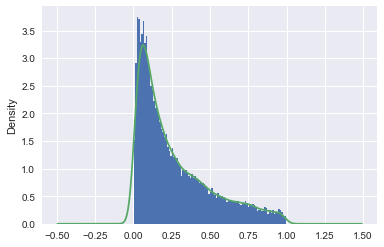

In [34]:
# 1)
de['wind'].plot.hist(bins=100, density=True)

# 2)
de['wind'].plot.density()

Now, let's look at the solar data:

<AxesSubplot:ylabel='Density'>

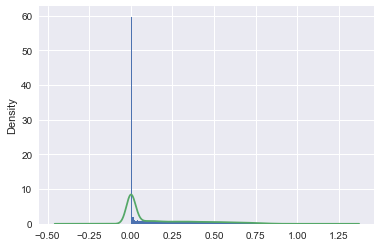

In [35]:
# 1)
de['solar'].plot.hist(bins=100, density=True)

# 2)
de['solar'].plot.density()

Somewhat hard to see (It's dark quite a long time!). Let's look at this in detail by limiting the y-axis shown to (0,2):

(0.0, 2.0)

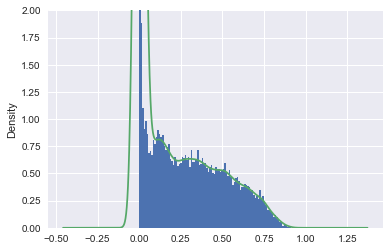

In [36]:
# 1)
de['solar'].plot.hist(bins=100, density=True)

# 2)
ax=de['solar'].plot.density()

ax.set_ylim(ymax=2)

Finally, let's look at the load profile:

<AxesSubplot:ylabel='Density'>

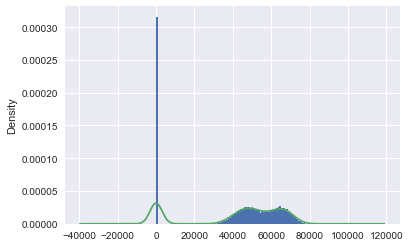

In [37]:
# 1)
de['load'].plot.hist(bins=100, density=True)

# 2)
de['load'].plot.density()

***
**(g) Apply a [(Fast) Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform) to the the three time series $X \in W(t), S(t), L(t)$:**

$$\tilde{X}(\omega) = \int_0^T X(t) \;e^{i\omega t} \;\mathrm{d}t.$$

**For all three regions, plot the energy spectrum $\|\tilde{X}(\omega)\|^2$ as a function of $\omega$. Discuss the relationship of these results with the findings obtained in (b)-(f).**

> **Remark:** Use the function [`numpy.fft.rfft`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html) and make sure you subtract the mean since the Fourier transformation requires the time series to have a zero mean to decompose it into its frequencies.

> **Remark:** To determine the frequencies [`numpy.fft.rfftfreq`](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.fft.rfftfreq.html) is used, the argument `d` indicates the distance between two data points, `1h` hour, which we specify as $\frac{1}{8760} a$, so that the frequencies come out in the unit $\frac{1}{a}$.

Text(0.5, 0, '1 / a')

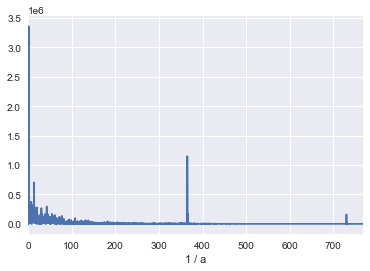

In [38]:
fft = abs(pd.Series(np.fft.rfft(de['wind'] - de['wind'].mean()),   # subtract mean!
                    index=np.fft.rfftfreq(len(de), d=1./8760))**2)
fft.plot()
plt.xlim(0, 768)
plt.xlabel('1 / a')

Text(0.5, 0, '1 / a')

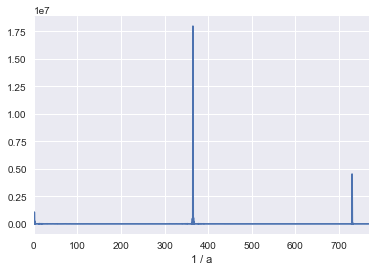

In [39]:
fft = abs(pd.Series(np.fft.rfft(de['solar'] - de['solar'].mean()),   # subtract mean!
                    index=np.fft.rfftfreq(len(de), d=1./8760))**2)
fft.plot()
plt.xlim(0, 768)
plt.xlabel('1 / a')

Text(0.5, 0, '1 / a')

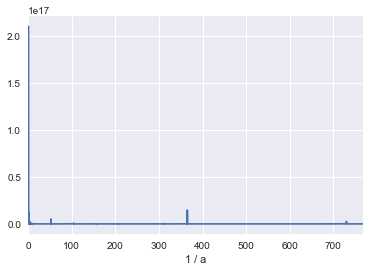

In [40]:
fft = abs(pd.Series(np.fft.rfft(de['load'] - de['load'].mean()),   # subtract mean!
                    index=np.fft.rfftfreq(len(de), d=1./8760))**2)
fft.plot()
plt.xlim(0, 768)
plt.xlabel('1 / a')

**Load:**

* The largest peak is 365 / a, i.e. once a day
* The second largest at 52 / a, i.e. once a week.
* There are also semi-daily patterns (e.g. morning and evening), cf. peak at 730 / a.
* Furthermore there are a few smaller peaks between daily and weekly patterns

**Solar:**

* The daily peak is very distinct.

**Wind:**

* Comparably more long-term patterns, cf interval < 100 / a.

***
**(h) Normalize the time series to one, so that $\langle{W}\rangle = \langle{S}\rangle = \langle{L}\rangle = 1$.**

**Now, for all three regions, plot the mismatch time series**
  
  $$\Delta(t) = \gamma \alpha W(t) + \gamma (1 - \alpha) S(t) - L(t) $$
  
**for the same winter and summer months as in (c). Choose** 
1. $\alpha \in \{0.0, 0.5, 0.75, 1.0\}$ with $\gamma = 1$, and 
2. $\gamma \in \{0.5, 0.75, 1.0, 1.25, 1.5\}$ with $\alpha = 0.75$.

**What is the interpretation of $\gamma$ and $\alpha$?**

**Which configuration entails the lowest mismatch on average and in extremes?**

Choose the country and alpha, gamma values and re-run:

* `d` could be `de`, `gb`, `eu`.

In [41]:
d = de
gamma = 1.0
alpha = 0

Normalize the time series and calculate mismatch time series:

In [42]:
d = d / d.mean()
m = gamma * alpha * d['wind'] + gamma * (1-alpha) * d['solar'] - d['load']

Plot the mismatch time series for the winter and summer months:

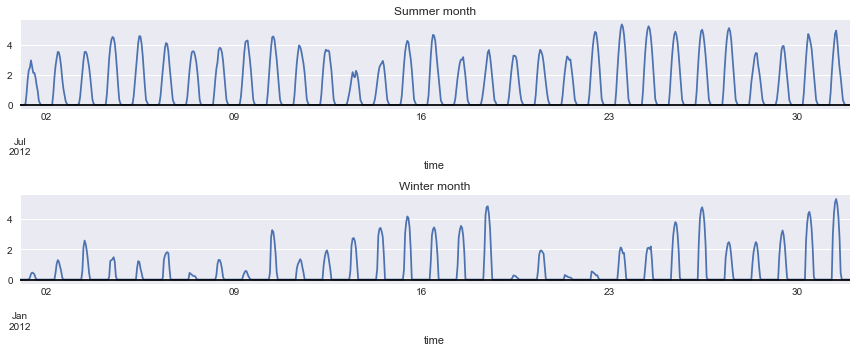

In [43]:
fig, axes = plt.subplots(2, 1, figsize=(12, 5))
m.loc["2012-07"].plot(ax=axes[0])
axes[0].set_title("Summer month")
m.loc["2012-01"].plot(ax=axes[1])
axes[1].set_title("Winter month")
for ax in axes:
    ax.axhline(0., color='k')
fig.tight_layout()

What is the interpretation of $\gamma$ and $\alpha$?
* `gamma=1` means that on average generation equals load.
* `gamma>1` means that more electricity is produced than consumed.
* `gamma<1` means that less electricity is produced than consumed.
* `alpha` defines the share between wind and solar.

***
**(i) For all three regions, repeat (b)-(g) for the mismatch time series. What changed?**

**Statistics**

In [44]:
m.describe()

count    3.506400e+04
mean    -3.890720e-17
std      1.534852e+00
min     -1.887096e+00
25%     -1.159373e+00
50%     -4.607129e-01
75%      6.891967e-01
max      6.073951e+00
dtype: float64

In [45]:
m.var()

2.355771074137324

**Time series plot**

<AxesSubplot:xlabel='time'>

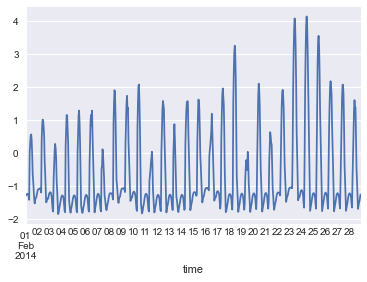

In [46]:
m.loc["2014-2"].plot()

<AxesSubplot:xlabel='time'>

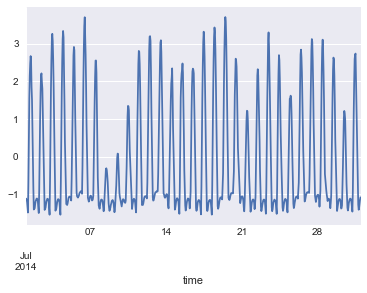

In [47]:
m.loc["2014-7"].plot()

<AxesSubplot:xlabel='time'>

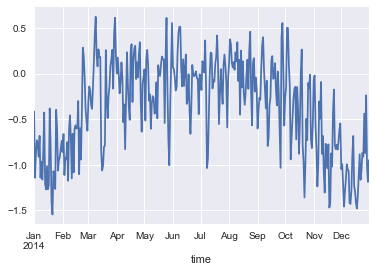

In [48]:
m.loc["2014"].resample("D").mean().plot()

<AxesSubplot:xlabel='time'>

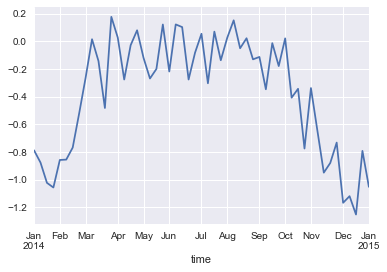

In [49]:
m.loc["2014"].resample("W").mean().plot()

**Duration curve**

<AxesSubplot:>

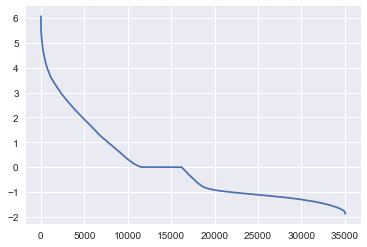

In [50]:
m.sort_values(ascending=False).reset_index(drop=True).plot()

**Probability density function**

<AxesSubplot:ylabel='Density'>

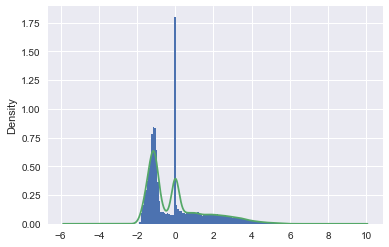

In [51]:
# 1)
m.plot.hist(bins=100, density=True)

# 2)
m.plot.density()

**Fast Fourier Transform**

Text(0.5, 0, '1 / a')

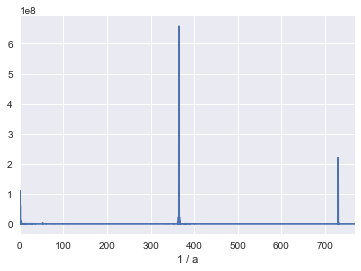

In [52]:
fft = abs(pd.Series(np.fft.rfft(m - m.mean()),   # Subtract mean
                    index=np.fft.rfftfreq(len(m), d=1./8760))**2)

fft.plot()
plt.xlim(0, 768)
plt.xlabel('1 / a')